In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [2]:
train = pd.read_csv('train.csv')
train.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [3]:
train.shape

(15681, 18)

In [4]:
test = pd.read_csv('test.csv')
test.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence
0,MSC_70753.0,"Bard, a Man of Lake-town - Extended Version",26.101,0.823765,0.115490,211462.287,0.125325,0.945272,Scale A Sharp,0.120392,-25.541,Both,Minor,0.038657,80.777,Duet,0.041238
1,MSC_24064.0,New Kings,66.325,0.015441,0.592838,249151.238,0.870798,0.000108,Scale E,0.406722,-3.905,Male,?,0.051368,76.00399999999999,Band,0.456309
2,MSC_22731.0,Silver Lining,71.871,0.001006,0.510340,215693.240,0.683077,0.000000,Scale C,0.084608,-6.825,Female,Major,0.034303,144.458,Solo,0.193332
3,MSC_32095.0,A Tale That Wasn't Right,56.151,0.315650,0.338336,307056.179,0.608904,0.000000,Scale A,0.276811,-8.382,Female,Minor,0.036934,118.145,Solo,0.214906
4,MSC_24198.0,Get Ready,43.687,0.038336,0.773904,352802.872,0.955500,0.000007,Scale D,0.301726,-4.733,Both,Major,0.079688,95.012,Duet,0.757347


In [5]:
test.shape

(3921, 17)

In [6]:
train.duplicated().sum()

0

In [7]:
train.isnull().sum()

instance_id             0
track_name              0
popularity            642
acousticness            0
danceability          556
duration_ms            94
energy                 94
instrumentalness       95
key                     0
liveness                0
loudness               36
voice_gender          765
mode                   35
speechiness            26
tempo                   0
musician_category    1360
valence               677
music_genre             0
dtype: int64

In [8]:
test.isnull().sum()

instance_id            0
track_name             0
popularity           166
acousticness           0
danceability         139
duration_ms           21
energy                33
instrumentalness      23
key                    0
liveness               0
loudness               3
voice_gender         186
mode                  14
speechiness            7
tempo                  0
musician_category    312
valence              191
dtype: int64

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15681 entries, 0 to 15680
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        15681 non-null  object 
 1   track_name         15681 non-null  object 
 2   popularity         15039 non-null  float64
 3   acousticness       15681 non-null  float64
 4   danceability       15125 non-null  float64
 5   duration_ms        15587 non-null  float64
 6   energy             15587 non-null  float64
 7   instrumentalness   15586 non-null  float64
 8   key                15681 non-null  object 
 9   liveness           15681 non-null  float64
 10  loudness           15645 non-null  float64
 11  voice_gender       14916 non-null  object 
 12  mode               15646 non-null  object 
 13  speechiness        15655 non-null  float64
 14  tempo              15681 non-null  object 
 15  musician_category  14321 non-null  object 
 16  valence            150

In [10]:
combined = pd.concat([train, test])
combined.head()

,instance_id,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,voice_gender,mode,speechiness,tempo,musician_category,valence,music_genre
0,MSC_83537.0,Estrellitas y Duendes,49.178,0.970522,0.580508,214625.776,0.192107,0.000000,Scale E,0.147134,-14.140,NaN,Major,0.046404,143.78799999999998,Band,0.598965,Jazz
1,MSC_22044.0,Al Norte,59.827,1.009380,0.687542,216232.195,0.265942,0.000031,Scale A,0.174655,-13.716,Male,?,0.039949,?,Band,0.357194,Jazz
2,MSC_62017.0,Yeah! (feat. Lil Jon & Ludacris),89.023,0.020041,0.967948,273314.723,0.857411,0.000000,Scale D,0.042030,-4.995,Female,Major,0.119917,105.01799999999999,Band,0.635525,Rap
3,MSC_76365.0,Can’t You See,55.762,0.010284,0.616287,189189.605,0.970513,0.000220,Scale D,0.124637,-4.262,Both,Major,0.167493,?,Duet,0.983750,Rock
4,MSC_71493.0,"Sonata III (G Moll), BWV 1029: Adagio",45.095,0.858769,0.280645,410136.987,0.114732,0.002753,Scale F Sharp,0.134782,-26.922,Female,Minor,0.039139,112.18299999999999,Band,0.074412,Classical


In [11]:
combined.shape

(19602, 18)

In [12]:
combined['key'].value_counts()

Scale C          2204
Scale G          2148
Scale D          2108
Scale C Sharp    2050
Scale A          1838
Scale F          1765
Scale E          1514
Scale A Sharp    1411
Scale B          1356
Scale G Sharp    1302
Scale F Sharp    1152
Scale D Sharp     754
Name: key, dtype: int64

In [13]:
train['music_genre'].value_counts()

Classical     3990
Rock          3879
Rap           3207
Jazz          2850
Country        683
Electronic     614
Hip-Hop        458
Name: music_genre, dtype: int64

In [14]:
combined['track_name'].nunique()

18267

In [15]:
combined['instance_id'].nunique()

19602

In [16]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19602 entries, 0 to 3920
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        19602 non-null  object 
 1   track_name         19602 non-null  object 
 2   popularity         18794 non-null  float64
 3   acousticness       19602 non-null  float64
 4   danceability       18907 non-null  float64
 5   duration_ms        19487 non-null  float64
 6   energy             19475 non-null  float64
 7   instrumentalness   19484 non-null  float64
 8   key                19602 non-null  object 
 9   liveness           19602 non-null  float64
 10  loudness           19563 non-null  float64
 11  voice_gender       18651 non-null  object 
 12  mode               19553 non-null  object 
 13  speechiness        19569 non-null  float64
 14  tempo              19602 non-null  object 
 15  musician_category  17930 non-null  object 
 16  valence            1873

In [17]:
x = ['popularity', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'valence']
for i in x:
    combined[i] = combined[i].fillna(combined[i].mean())

In [18]:
combined['musician_category'].value_counts()

Band    6012
Solo    5962
Duet    5956
Name: musician_category, dtype: int64

In [19]:
x = ['voice_gender', 'mode', 'musician_category']
for i in x:
    combined[i] = combined[i].fillna(combined[i].value_counts().index[0])

In [20]:
combined['mode'].value_counts()

Major    11601
Minor     6677
?         1324
Name: mode, dtype: int64

In [21]:
combined['mode'] = combined['mode'].replace({'?' : 'Major'})

In [22]:
combined['tempo'].value_counts()

?                     1867
100.01                   8
100.014                  7
100.00299999999999       7
119.985                  7
                      ... 
93.618                   1
73.01899999999999        1
131.994                  1
91.085                   1
127.85600000000001       1
Name: tempo, Length: 14925, dtype: int64

In [23]:
combined['tempo'] = combined['tempo'].replace({'?' : 0})
combined['tempo'] = combined['tempo'].astype(float)

In [24]:
combined['tempo'] = combined['tempo'].replace({0 : combined['tempo'].mean()})

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [26]:
x = ['track_name', 'voice_gender', 'mode', 'musician_category', 'key']
for i in x:
    combined[i] = le.fit_transform(combined[i])

In [27]:
combined.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19602 entries, 0 to 3920
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   instance_id        19602 non-null  object 
 1   track_name         19602 non-null  int32  
 2   popularity         19602 non-null  float64
 3   acousticness       19602 non-null  float64
 4   danceability       19602 non-null  float64
 5   duration_ms        19602 non-null  float64
 6   energy             19602 non-null  float64
 7   instrumentalness   19602 non-null  float64
 8   key                19602 non-null  int32  
 9   liveness           19602 non-null  float64
 10  loudness           19602 non-null  float64
 11  voice_gender       19602 non-null  int32  
 12  mode               19602 non-null  int32  
 13  speechiness        19602 non-null  float64
 14  tempo              19602 non-null  float64
 15  musician_category  19602 non-null  int32  
 16  valence            1960

In [28]:
newtrain = combined.iloc[0:15681, :]
newtrain.shape

(15681, 18)

In [29]:
newtest = combined.iloc[15681: , :]
newtest.shape

(3921, 18)

In [30]:
newtrain = newtrain.drop('instance_id', axis = 1)
newtrain.shape

(15681, 17)

In [31]:
newtest = newtest.drop(['instance_id', 'music_genre'], axis = 1)
newtest.shape

(3921, 16)

In [32]:
x = newtrain.drop('music_genre', axis = 1)
y = newtrain['music_genre']

In [33]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7924768887472107


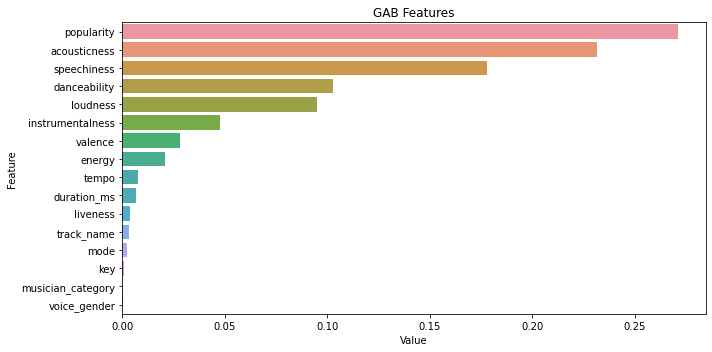

In [36]:
feature_imp = pd.DataFrame(sorted(zip(gab.feature_importances_, x.columns), reverse=True)[:], columns=['Value','Feature'])
plt.figure(figsize=(10,5))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('GAB Features')
plt.tight_layout()
plt.show()


In [37]:
x = newtrain.drop(['music_genre', 'key', 'musician_category', 'voice_gender'], axis = 1)
y = newtrain['music_genre']

In [38]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier()
y_pred = gab.fit(x_train, y_train).predict(x_test)
print(accuracy_score(y_test, y_pred))

0.7937519923493784


In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
parameters = {
    "n_estimators":[1,4,6,7],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.1,1],
}

In [42]:
grid = GridSearchCV(estimator = gab, param_grid = parameters, cv = 5)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 1],
                         'max_depth': [1, 3, 5, 7, 9],
                         'n_estimators': [1, 4, 6, 7]})

In [43]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 7}

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 7)
y_pred = gab.fit(x_train, y_train).predict(x_test)

In [51]:
x_train = newtrain.drop(['music_genre', 'key', 'musician_category', 'voice_gender'], axis = 1)
y_train = newtrain['music_genre']
x_test = newtest.drop(['key', 'musician_category', 'voice_gender'], axis = 1)

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
gab = GradientBoostingClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 7)
y_pred = gab.fit(x_train, y_train).predict(x_test)

In [55]:
solution = pd.DataFrame({'instance_id': test.instance_id, 'music_genre': y_pred})
solution.head()

,instance_id,music_genre
0,MSC_70753.0,Classical
1,MSC_24064.0,Rock
2,MSC_22731.0,Rock
3,MSC_32095.0,Rock
4,MSC_24198.0,Jazz


In [56]:
solution.to_csv('Solution.csv', index = False)